# 주성분 분석
: 서로 연관되어 있는 변수들의 관계를 통한 새로운 변수를 생성하는 방법

In [1]:
# 설문지를 통한 주성분 분석 (파스타집 메뉴에 대한 설문조사, 면과 그릇과 소스에 대한 만족도) 
data <- read.table("../Data/pasta.txt")
head(data)

,noodle,dishes,sauce
pesto_alla_Genovese,2,4,5
Marinara,1,5,1
Puttanesca,5,3,4
Primavera,2,2,3
Vongole,3,5,5
Boscaiola,4,3,2


In [2]:
# 다중 공선성 확인 : 너무 상관이 높아서 마치 쌍둥이 데이터 확인 ex. 변수들이 correlation이 높으면 그 중 하나만 분석해야 한다. 
cor(data)

,noodle,dishes,sauce
noodle,1.0000000,0.1905002,0.3600411
dishes,0.1905002,1.0000000,0.3004804
sauce,0.3600411,0.3004804,1.0000000


In [5]:
# 표준화 적용 여부 : ex. 데이터가 퍼져 있지 않고 분석할 수 있는 범위 내로 데이터를 묶기 (서로 같은 범위 공유) 
# 평균이 0, 표준편차 1로 변경 

# 적용 전
summary(data)

# 적용 후 
data1 <- scale(data)
summary(data1) # 평균값 0, 표준편차 1

     noodle      dishes         sauce     
 Min.   :1   Min.   :2.00   Min.   :1.00  
 1st Qu.:2   1st Qu.:3.00   1st Qu.:2.00  
 Median :3   Median :3.50   Median :3.00  
 Mean   :3   Mean   :3.60   Mean   :2.90  
 3rd Qu.:4   3rd Qu.:4.75   3rd Qu.:3.75  
 Max.   :5   Max.   :5.00   Max.   :5.00  

     noodle            dishes             sauce         
 Min.   :-1.3416   Min.   :-1.36311   Min.   :-1.31112  
 1st Qu.:-0.6708   1st Qu.:-0.51117   1st Qu.:-0.62106  
 Median : 0.0000   Median :-0.08519   Median : 0.06901  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.6708   3rd Qu.: 0.97973   3rd Qu.: 0.58656  
 Max.   : 1.3416   Max.   : 1.19272   Max.   : 1.44914  

In [9]:
# 표준편차 확인 
sd(data1[,3])
apply(data1, 2, sd) # 3개 변수 sd 한꺼번에 보기 -> (data1, 1번 방향은 행별로 2번 방향 컬럼별로, 표준편차)

[1] 1

noodle dishes  sauce 
     1      1      1

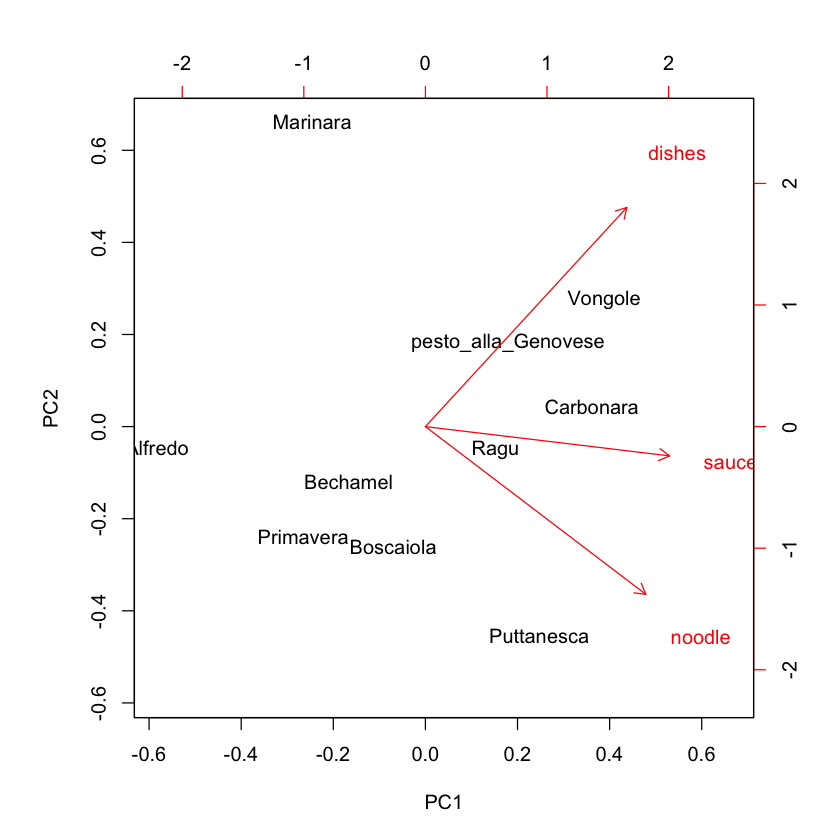

In [11]:
# 주성분 분석 
p1 <- prcomp(data, scale=T) # scale을 보게됨
biplot(p1)

In [14]:
# 라면 데이터로 주성분 분석
ramen <- read.table("../Data/라면.txt", fileEncoding = "euc-kr")
head(ramen)

,면발,포장재,국물
신라면,2,4,5
짜파게티,5,2,1
쌀사리곰탕면,3,4,3
무파마,3,3,5
안성탕면,1,2,3
오징어짬뽕,1,3,4


In [18]:
summary(ramen)
ramen1 <- scale(ramen)
summary(ramen1)

      면발          포장재          국물     
 Min.   :1.00   Min.   :2.00   Min.   :1.00  
 1st Qu.:1.75   1st Qu.:2.75   1st Qu.:3.00  
 Median :2.50   Median :3.00   Median :4.00  
 Mean   :2.50   Mean   :3.00   Mean   :3.75  
 3rd Qu.:3.00   3rd Qu.:3.25   3rd Qu.:5.00  
 Max.   :5.00   Max.   :4.00   Max.   :5.00  

      면발             포장재             국물        
 Min.   :-1.1456   Min.   :-1.3229   Min.   :-1.9802  
 1st Qu.:-0.5728   1st Qu.:-0.3307   1st Qu.:-0.5401  
 Median : 0.0000   Median : 0.0000   Median : 0.1800  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.3819   3rd Qu.: 0.3307   3rd Qu.: 0.9001  
 Max.   : 1.9094   Max.   : 1.3229   Max.   : 0.9001  

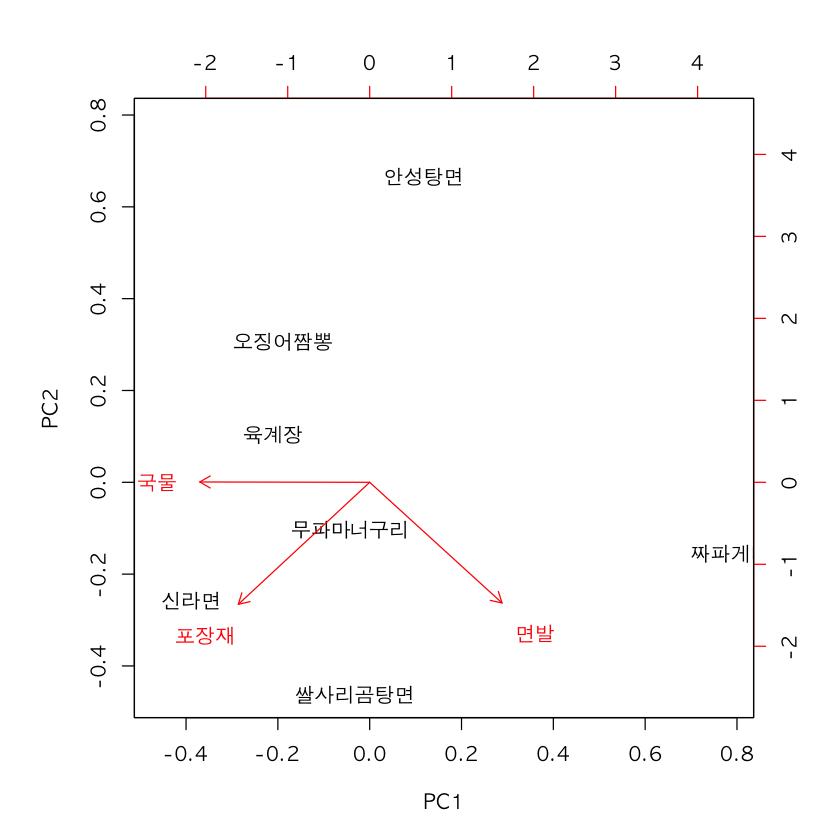

In [21]:
options(warn= -1)
par(family="AppleGothic")
r1 <- prcomp(ramen1, scale=T)
biplot(r1)

# USArrests 
1973년 미국 50개 주에서 각각 10만명 폭행, 살인, 강간으로 체포된 데이터     
또한 도시 지역에 살고 있는 인구의 비율(urbab population)도 주어진다. 

In [23]:
data(USArrests)
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [24]:
# 데이터의 상관관계
cor(USArrests)

,Murder,Assault,UrbanPop,Rape
Murder,1.00000000,0.8018733,0.06957262,0.5635788
Assault,0.80187331,1.0000000,0.25887170,0.6652412
UrbanPop,0.06957262,0.2588717,1.00000000,0.4113412
Rape,0.56357883,0.6652412,0.41134124,1.0000000


In [25]:
# 주성분 분석 실행  (prcomp는 설문지 데이터 대상)
result <- princomp(USArrests, cor=T)
summary(result)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

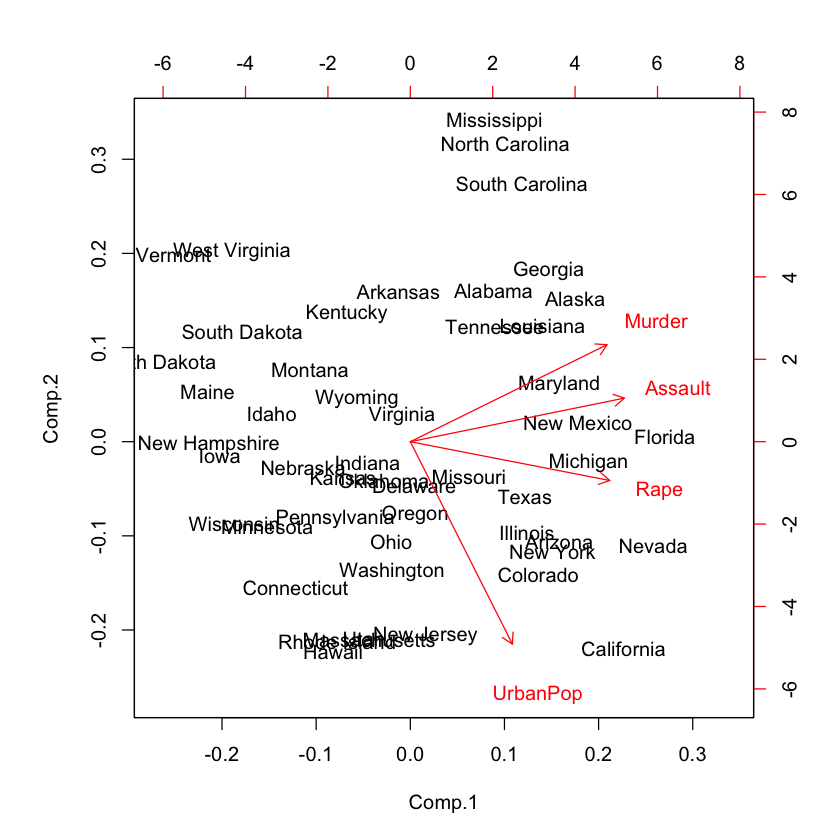

In [26]:
biplot(result)
# murder, assault, rape 같은 방향. 범죄 우발 지역이 어디인지 확인할 수 있음 

In [27]:
result$loadings 
# comp.1(1주성분) 


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

In [28]:
# 1주성분(계수값)으로 새로운 변수값 생성 (높을 수록 범죄가 많이 발생하는 지역) 
# -> 62% 대변하고 있다. (cf.summary(result)의 cumulative proportion의 comp.1)
0.536 * USArrests$Murder + 0.583 * USArrests$Assault + 0.278 * USArrests$UrbanPop + 0.543 * USArrests$Rape

[1] 172.2988 196.1965 214.8166 139.9753 213.0758 165.8645  93.3321 170.5118
 [9] 243.1211 163.0288  63.7014  94.0762 186.8474  99.2112  55.8091  98.3830
[17]  92.0531 183.8240  67.9280 214.6782 121.7063 194.7819  69.8619 181.1439
[25] 143.3706  90.4022  87.9663 200.9512  55.0831 131.6138 209.1557 192.1119
[33] 224.6913  42.8597 106.3430 121.3346 129.8593  93.2815 131.9573 195.9369
[41]  71.6352 147.6879 160.0767 106.3499  44.1408 124.2581 121.1996  66.1701
[49]  56.5050 122.6586

---
# Machine Learning 
# 인공신경망 
- 알파고로 인해 급부상 (빅데이터 분석할 때 여러 pc로 사용할 수 있는 r로 만들어짐 <-> 파이썬은 pc 1대로)
- hadoop 
- r은 java와 연결됨

In [29]:
head(iris) #na값, 이상치, 정렬된 데이터 (데이터 정제과정 중요)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [37]:
# 1) 학습용 데이터와 검증용 데이터 분리 # 70%이기에 34개 
set.seed(1234) # set.seed로 하면 sample 데이터 변하지 않음. 
samp <- c(sample(1:50, 35), sample(51:100, 35), sample(101:150, 35))
samp

[1]  28  16  22  37  44   9   5  38  49   4  34  39  48  26   6  15  14  40
 [19]  30  24  32  41  29  21   8  20  31   3  50  46   2  35  47  42  12  53
 [37]  73  91  86  58  82  92  93  52  65  88  56  79  95  96  76  67  97  60
 [55]  98  72 100  59  66  90  80  87  99  75  63  85  69  68  89  62 120 141
 [73] 107 132 106 137 127 112 108 101 136 128 119 109 130 117 122 146 121 147
 [91] 113 135 102 133 126 139 131 116 111 104 103 124 110 144 129

In [38]:
# 학습용 데이터 셋
data.tr <- iris[samp,]
head(data.tr)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
28,5.2,3.5,1.5,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa
22,5.1,3.7,1.5,0.4,setosa
37,5.5,3.5,1.3,0.2,setosa
44,5.0,3.5,1.6,0.6,setosa
9,4.4,2.9,1.4,0.2,setosa


In [40]:
# 검증용 데이터셋 
data.test <- iris[-samp,]  #sample 숫자 똑같은 거 나오면 시험 보는 자료와 동일함. 그렇기 때문에 sample 제외한 값 -붙여주기 
head(data.test)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
10,4.9,3.1,1.5,0.1,setosa
11,5.4,3.7,1.5,0.2,setosa
13,4.8,3.0,1.4,0.1,setosa
17,5.4,3.9,1.3,0.4,setosa


In [42]:
summary(data.tr)
summary(data.test)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:15  
 Median :5.800   Median :3.100   Median :4.70   Median :1.400   virginica :15  
 Mean   :5.836   Mean   :3.093   Mean   :3.78   Mean   :1.222                  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.10   3rd Qu.:1.900                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.500                  

In [43]:
# 2) 학습 시키기 
# 인공 신경망 neural network
library(nnet)

In [44]:
model.nnet <- nnet(Species ~ ., data = data.tr, size= 3) #size: 은닉층 개수 # .은 모든 컬럼 중에 앞에 있는 species 빼고 다 

# weights:  27
initial  value 121.492256 
iter  10 value 110.581609
iter  20 value 49.740861
iter  30 value 26.600820
iter  40 value 1.834814
iter  50 value 0.008937
final  value 0.000074 
converged


In [46]:
# 3) 검증하기 
# 시험문제
x <- data.test[,1:4] 
# 정답 
y <- data.test[,5]

In [47]:
# ai가 예측한 답안 
pred <- predict(model.nnet, x, type="class") # classification(분류-> 객관식), raw(주관식) 
pred

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[16] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[21] "versicolor" "versicolor" "virginica"  "versicolor" "versicolor"
[26] "versicolor" "versicolor" "versicolor" "virginica"  "versicolor"
[31] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[36] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[41] "virginica"  "virginica"  "virginica"  "virginica"  "virginica"

In [49]:
# 예측력 : 정답확인 
mean(y ==pred) 

[1] 0.9555556

In [50]:
# 오분류표 (각 항목이 맞춘게 비슷하게 나온다고 반드시 좋은 거 아님 95% 예측력 반드시 높은 것은 아님!)
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         0
  virginica       0          2        15

In [58]:
# 학습시킨 머신러닝 사용하기 
# Sepal.Length = 5.3 
# Sepal.Width = 3.3
# Petal.Length = 1.6
# Petal.Width = 0.3

model.nnet <- nnet(Species ~ ., data = iris, size= 3) # data를 iris로 바꾸어야함. 전체 데이터 150개로. 

data_iris <- data.frame(Sepal.Length = 5.3, Sepal.Width = 3.3,Petal.Length = 1.6, Petal.Width = 0.3)
predict(model.nnet,data_iris, type="class")

# weights:  27
initial  value 180.656304 
iter  10 value 58.982459
iter  20 value 7.654091
iter  30 value 5.476439
iter  40 value 4.943576
iter  50 value 4.922347
iter  60 value 4.921965
final  value 4.921959 
converged


[1] "setosa"

In [59]:
predict(model.nnet,data_iris, type="raw") #주관식

setosa,versicolor,virginica
1,1.405011e-15,3.530936e-103


In [63]:
# 학습시킨 머신러닝 사용하기 
# Sepal.Length = 9.3 
# Sepal.Width = 2.2
# Petal.Length = 7.5
# Petal.Width = 3.5

model.nnet <- nnet(Species ~ ., data = iris, size= 3) 

data_i <- data.frame(Sepal.Length = 9.3, Sepal.Width = 2.2, Petal.Length = 7.5, Petal.Width = 3.5)
predict(model.nnet,data_i, type="class")

# data.fram은 데이터가 많을 때 or list() 사용하면 한 줄에 표현가능 
 
predict(model.nnet, list(Sepal.Length = 9.3,
                         Sepal.Width = 2.2,
                         Petal.Length = 7.5,
                         Petal.Width = 3.5), type="class")

# weights:  27
initial  value 189.150136 
iter  10 value 92.591467
iter  20 value 69.339041
iter  30 value 69.314745
final  value 69.314718 
converged


[1] "virginica"

[1] "virginica"

In [64]:
summary(iris) # 위의 값 이상치. (max 범위 넘어섰음)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [66]:
# 의사결정나무 
install.packages("party")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [67]:
library(party)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [68]:
head(data.tr)
head(data.test)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
28,5.2,3.5,1.5,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa
22,5.1,3.7,1.5,0.4,setosa
37,5.5,3.5,1.3,0.2,setosa
44,5.0,3.5,1.6,0.6,setosa
9,4.4,2.9,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
10,4.9,3.1,1.5,0.1,setosa
11,5.4,3.7,1.5,0.2,setosa
13,4.8,3.0,1.4,0.1,setosa
17,5.4,3.9,1.3,0.4,setosa


In [69]:
# 학습 시키기 
model.ctree <- ctree(Species ~ ., data=data.tr)

In [70]:
# 검증하기 
pred <- predict(model.ctree, x)
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     versicolor setosa     setosa    
[13] setosa     setosa     versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor virginica  versicolor
[25] versicolor virginica  versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] versicolor virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [71]:
# 예측력 확인 
mean(pred == y)

[1] 0.8888889

In [72]:
# 오분류표 
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         13          0         0
  versicolor      2         13         1
  virginica       0          2        14

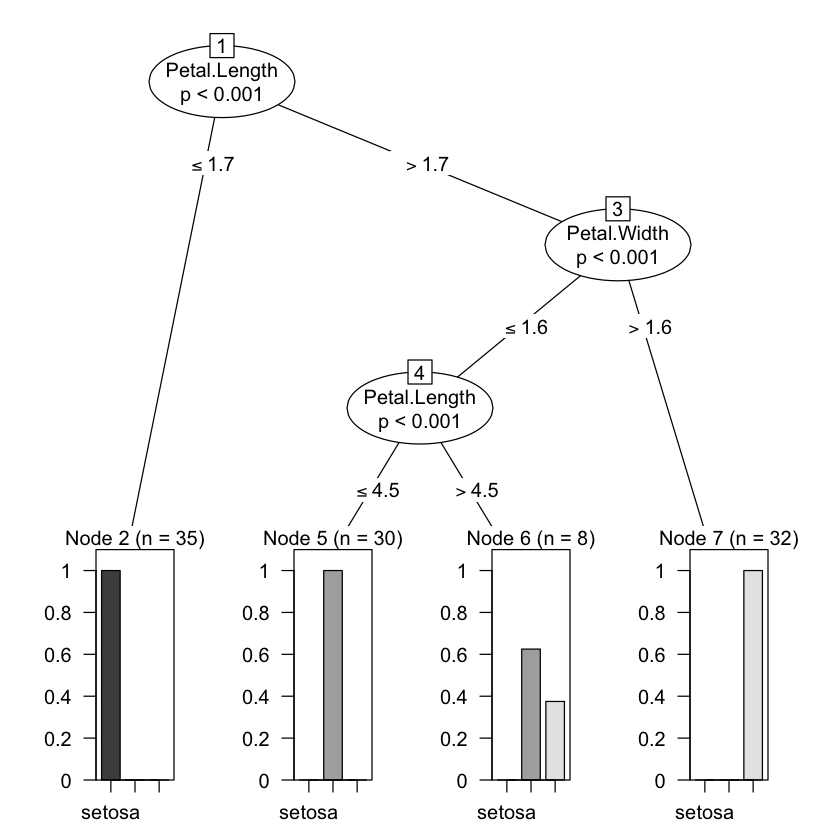

In [73]:
plot(model.ctree)
# 막대그래프 x축 setosa, versicolor, versinica 

In [74]:
# RandomForest -> ctree 예측력 비교적 낮아서 대안으로 개발됨.
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [75]:
# 학습 시키기 
rf <- randomForest(Species ~ ., data=data.tr, ntree = 100)

In [81]:
# 검증하기 
pred <- predict(rf, x)
pred

1          7         10         11         13         17         18 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        19         23         25         27         33         36         43 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        45         51         54         55         57         61         64 
    setosa versicolor versicolor versicolor versicolor versicolor versicolor 
        70         71         74         77         78         81         83 
versicolor  virginica versicolor versicolor  virginica versicolor versicolor 
        84         94        105        114        115        118        123 
 virginica versicolor  virginica  virginica  virginica  virginica  virginica 
       125        134        138        140        142        143        145 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       148        149        150 
 virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [78]:
# 예측력 
mean(pred== y)

[1] 0.9333333

In [79]:
# 오분류표
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

# 교통사고 예측하기  (회귀식과 randomForest 예측 비교)

In [82]:
seoul <- read.csv("../Data/newSeoulAccident.csv", fileEncoding = "euc-kr") # mac에서 만든 파일을 윈도우에서 열려면 "utf-8"
head(seoul)

연도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [83]:
# 종로구 데이터셋 만들기 
JongRO <- subset(seoul, 자치구명 == "종로구")
nrow(JongRO)

[1] 84

In [85]:
head(JongRO)
tail(JongRO) # rownames 바꾸기 1812번이 아니라 84번으로

연도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,연도,월,자치구명,발생건수,사망자수,부상자수
1807,2017,7,종로구,87,2,141
1808,2017,8,종로구,81,0,119
1809,2017,9,종로구,112,1,155
1810,2017,10,종로구,94,0,145
1811,2017,11,종로구,97,2,115
1812,2017,12,종로구,108,2,155


In [86]:
# rowname 정리 
rownames(JongRO) <- c()
tail(JongRO)

,연도,월,자치구명,발생건수,사망자수,부상자수
79,2017,7,종로구,87,2,141
80,2017,8,종로구,81,0,119
81,2017,9,종로구,112,1,155
82,2017,10,종로구,94,0,145
83,2017,11,종로구,97,2,115
84,2017,12,종로구,108,2,155


In [87]:
# 내부구조 
str(JongRO) # factor 조정해야함 25가 아니라 종로구 하나만 보니까 1로 바뀌어야함 

'data.frame':	84 obs. of  6 variables:
 $ 연도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [88]:
# factor 조정 
JongRO$자치구명 <- factor(JongRO$자치구명)
str(JongRO)

'data.frame':	84 obs. of  6 variables:
 $ 연도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 1 level "종로구": 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [89]:
# 종로의 교통사고 발생건수와 부상자수 상관계수 
cor(JongRO$발생건수, JongRO$부상자수)

[1] 0.9078793

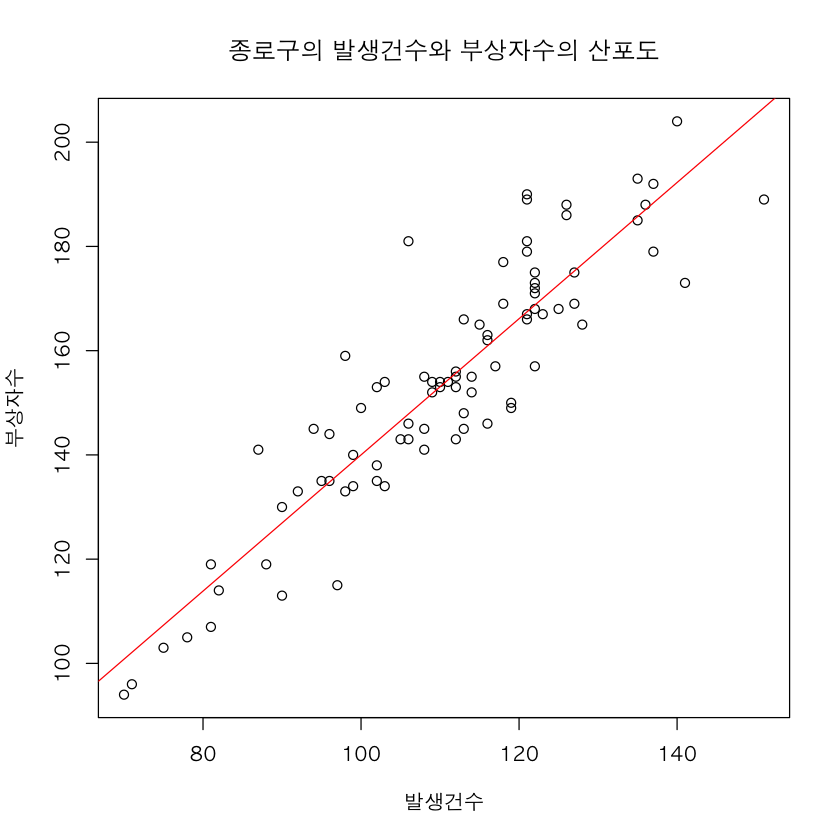

In [92]:
# 회귀선
options(warn = -1)
par(family = "AppleGothic")

plot(JongRO$부상자수 ~ JongRO$발생건수,
    xlab = "발생건수",
    ylab = "부상자수",
    main = "종로구의 발생건수와 부상자수의 산포도")

r <- lm(JongRO$부상자수 ~ JongRO$발생건수)
abline(r, col = "red")

In [93]:
# 예측률
summary(r) 


Call:
lm(formula = JongRO$부상자수 ~ JongRO$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.084  -6.149  -0.410   4.756  33.156 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.34192    7.44736   1.254    0.213    
JongRO$발생건수  1.30662    0.06663  19.610   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.08 on 82 degrees of freedom
Multiple R-squared:  0.8242,	Adjusted R-squared:  0.8221 
F-statistic: 384.6 on 1 and 82 DF,  p-value: < 2.2e-16


In [94]:
# 회귀식 
r


Call:
lm(formula = JongRO$부상자수 ~ JongRO$발생건수)

Coefficients:
    (Intercept)  JongRO$발생건수  
          9.342            1.307  


부상자수 = 1.307 * 발생건수 + 9.342

In [95]:
# 발생건수가 100건
1.307 * 100 + 9.342 #140명 부상자 수 

[1] 140.042

In [96]:
# RandomForest 예측 100건 # .이 아니라 부상자수와 발생건수만 볼 거라 factor없기 때문에 따로 신경 안쓰고 집어넣음
rf <- randomForest(부상자수 ~ 발생건수, data=JongRO, ntree=100)
predict(rf, list(발생건수=100))

1 
143.8867

In [97]:
# plot에서 데이터 부분을 보면 데이터가 어느 정도 있어야함 (많이 분포되어 있는), 50에서는 데이터가 많이 없기 때문에 차이가 크게남 
# 발생건수가 50건
1.307 * 50 + 9.342  
predict(rf, list(발생건수=50))

[1] 74.692

1 
98.34933

In [98]:
# plot에서 110은 데이터 많음 그래서 회귀식과 머신러닝 사이에 차이가 별로 안남 
# 발생건수가 110건
1.307 * 110 + 9.342  
predict(rf, list(발생건수=110))

[1] 153.112

1 
153.3072